# SciPy - библиотека математических алгоритмов для Python

Фреймворк SciPy построен на основе низкоуровневого фреймворка NumPy для работы с многомерными массивыми и предоставляет большое количество математических алгоритмов. Вот некоторые из тем, которые охватывает SciPy:
 
* Специальные функции ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))
* Интеграция ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Оптимизация ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Интерполяция ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Преобразования Фурье ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Обработка сигналов ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Линейная алгебра ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Статистика ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Обработка многомерных изображений ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))
* Ввод-вывод данных ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))
 
Каждый из этих модулей предоставляет ряд функций и классов, которые можно использовать для решения проблем в соответствующих областях.
 
Чтобы получить доступ к пакету SciPy, нужно импортировать все содержимое модуля scipy.

In [ ]:
from scipy import *

Если нужно использовать только часть фреймворка SciPy, можно выборочно включать только те модули, которые необходимы. Например, чтобы включить пакет линейной алгебры под псевдонимом `la`, используется следующая команда.

In [ ]:
import scipy.linalg as la

Также импортируем библиотеку для построения графиков.

In [ ]:
import matplotlib.pyplot as plt

## Преобразование Фурье

Преобразования Фурье - один из универсальных инструментов, который периодически пригождается в самых разных задачах.

In [ ]:
from numpy.fft import fftfreq
from scipy.fftpack import *
import numpy as np

Генерация сигнала, который будет обработан с помощью преобразования Фурье.

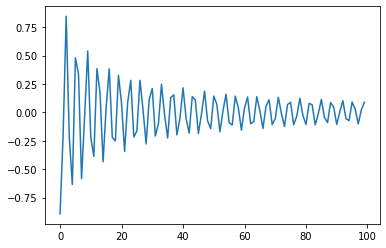

In [ ]:
y = np.sin(30 * np.linspace(-3, 3, 100)) / np.linspace(1, 10, 100)
plt.plot(y);

In [ ]:
N = len(y)
F = fft(y) # вычисление быстрого преобразования Фурье
w = fftfreq(N, 0.3) # вычисление частот для компонент в F

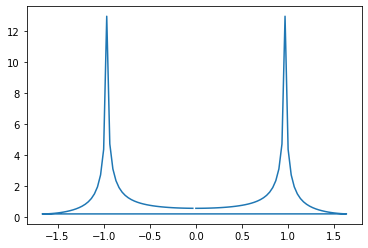

In [ ]:
plt.plot(w, abs(F));

Спектр получился симметричный, поэтому нужно построить только ту часть, которая соответствует положительным частотам. Чтобы извлечь эту часть w и F, можно использовать приемы индексации массивов NumPy, описанные выше.

In [ ]:
indices = np.where(w > 0) # извлечение индексов, соответствующих только положительным частотам
w_pos = w[indices]
F_pos = F[indices]

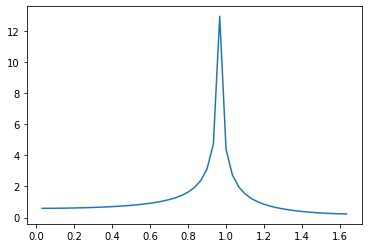

In [ ]:
plt.plot(w_pos, abs(F_pos))

## Линейная алгебра

Модуль линейной алгебры содержит множество функций, связанных с работой с матрицами, включая решение линейных уравнений, нахождение собственных значений, применение матричных функций (например, возведение в степень матрицы), ряд различных декомпозиций (SVD, LU) и т.д.

Системы линейных уравнений в матричной форме
 
$ A x = b $
 
где $ A $ - матрица, а $ x, b $ - векторы, могут быть решены следующим образом.

In [ ]:
from scipy.linalg import *

In [ ]:
A = np.array([[1, 2, 3], [1, 5, -2], [7, 8, 9]])
b = np.array([1, 2, 3])

In [ ]:
x = solve(A, b)
print(x)

[-0.24242424  0.48484848  0.09090909]


In [ ]:
print(np.dot(A, x) - b) # проверка ответа

[-1.11022302e-16  0.00000000e+00  0.00000000e+00]


То же самое можно сделать с уравнением
 
$ A X = B $
 
где $ A, B, X $ - матрицы.

In [ ]:
A = np.random.rand(3, 3)
B = np.random.rand(3, 3)

In [ ]:
X = solve(A, B)

In [ ]:
print(X)

[[ 1.36909929  0.35255939  2.37368208]
 [ 1.36256826  0.17929117  1.06658812]
 [-4.44489118  1.01074579 -6.8800598 ]]


In [ ]:
print(np.dot(A, X) - B) # проверка ответа

[[ 2.22044605e-16  0.00000000e+00  1.38777878e-16]
 [ 2.22044605e-16  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.11022302e-16]]


## Оптимизация

Оптимизация (поиск минимумов или максимумов функции) - обширная область математики. Оптимизация сложных функций от многих переменных может быть довольно сложной, но в данном ноутбуке использование SciPy будет продемонстрировано на более простых примерах.

In [ ]:
from scipy import optimize

Нахождение минимума простой функции от одной переменной.


In [ ]:
def f(x):
    return 4 * x**3 + (x - 2)**2 + x**4

In [ ]:
x_min = optimize.fmin_bfgs(f, -2)
print(x_min) 

Optimization terminated successfully.
         Current function value: -3.506641
         Iterations: 5
         Function evaluations: 24
         Gradient evaluations: 8
[-2.67298151]


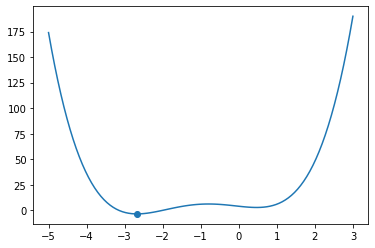

In [ ]:
x = np.linspace(-5, 3, 100)
plt.plot(x, f(x));
plt.scatter(x_min[0], f(x_min[0]));

Также можно использовать функции brent или fminbound. У них немного другой синтаксис и разные алгоритмы.

In [ ]:
print(optimize.brent(f))

0.46961743402759754


In [ ]:
print(optimize.fminbound(f, -4, 2))

-2.6729822917513886


## Интерполяция

Интерполяция - это нахождение неизвестных промежуточных значений некоторой функции по имеющемуся дискретному набору ее известных значений. Интерполяция в scipy проста и удобна: функция interp1d принимает на вход массивы Х и Y, описывающие данные, и возвращает два аргумента:
* объект, который ведет себя как функция, которая может быть вызвана для произвольного значения x (в диапазоне, охватываемом X),
* соответствующее интерполированное значение y.

In [ ]:
from scipy.interpolate import *

In [ ]:
def f(x):
    return np.sin(x)

In [ ]:
n = np.arange(0, 10)  
x = np.linspace(0, 9, 100)

y_meas = f(n) + 0.1 * np.random.randn(len(n))
y_real = f(x)

linear_interpolation = interp1d(n, y_meas)
y_interp1 = linear_interpolation(x)

cubic_interpolation = interp1d(n, y_meas, kind='cubic')
y_interp2 = cubic_interpolation(x)

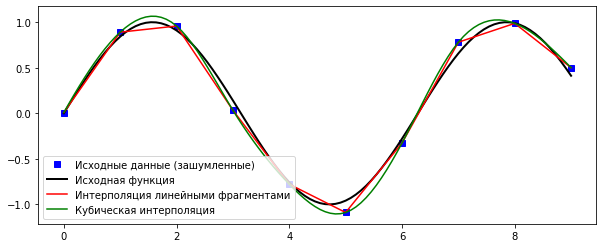

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(n, y_meas, 'bs', label='Исходные данные (зашумленные)')
ax.plot(x, y_real, 'k', lw=2, label='Исходная функция')
ax.plot(x, y_interp1, 'r', label='Интерполяция линейными фрагментами')
ax.plot(x, y_interp2, 'g', label='Кубическая интерполяция')
ax.legend(loc=3);

## Статистика

Модуль scipy.stats содержит большое количество статистических распределений, статистических функций и тестов.

In [ ]:
from scipy import stats

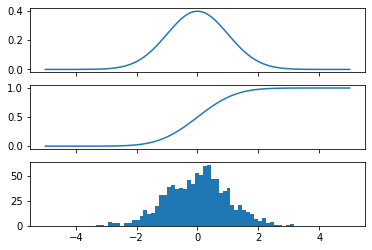

In [ ]:
Y = stats.norm() # создание случайной величины с нормальным распределением
x = np.linspace(-5, 5, 100)

fig, axes = plt.subplots(3, 1, sharex=True)

# plot the probability distribution function (PDF)
axes[0].plot(x, Y.pdf(x)) # построение функциии распределения вероятностей (PDF)
axes[1].plot(x, Y.cdf(x)); # построение кумулятивной функции распределения (СDF)
axes[2].hist(Y.rvs(size=1000), bins=50); # гистограмма по 1000 сгенерированных из распределения значений

Вычисление статистик.

In [ ]:
Y.mean(), Y.std(), Y.var()

(0.0, 1.0, 1.0)